# Linear Algebra and Numpy

Linear algebra is the math underlying much of machine learning, including sklearn's LinearRegression we've been using.  You should probably take a linear algrebra course at some point if you haven't already.

In 320, we'll some very basic ideas.  Let's start with some intuition.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 16

A linear relationship between two variables looks like a straight line when plotted (contrast this with the quadtratic line, which is not linear):

Text(0, 0.5, 'y')

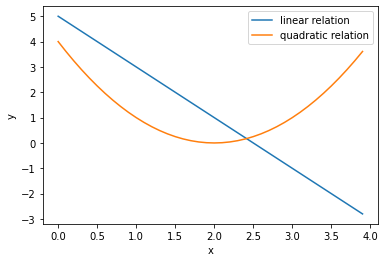

In [2]:
df = pd.DataFrame({"x": np.arange(0, 4, 0.1)})
df["linear relation"] = df["x"] * -2 + 5
df["quadratic relation"] = (df["x"] - 2) ** 2
ax = df.set_index("x").plot.line()
ax.set_ylabel("y")

Straight lines generalize to flat planes in 3 dimensions (or hyperplanes in more dimensions!).

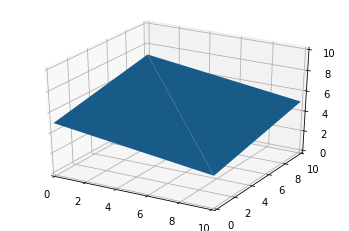

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', xlim=(0,10), ylim=(0,10), zlim=(0,10))
ax.plot_trisurf(np.array([0, 0, 10, 10]),
                   np.array([0, 10, 10, 0]),
                   np.array([5,7,5,3]))

## Numpy Arrays

Linear algebra will involve working with matrices and vectors; we'll learn numpy for that.  Pandas and sklearn are already based on numpy.

In [4]:
df = pd.DataFrame([[0,2,1], [2,3,4], [8,5,6]], columns=["x1", "x2", "y"])
df

,x1,x2,y
0,0,2,1
1,2,3,4
2,8,5,6


Internally, we have a numpy array:

In [5]:
df.values # a 2-dimensional numpy array

array([[0, 2, 1],
       [2, 3, 4],
       [8, 5, 6]])

In [6]:
type(df.values)

numpy.ndarray

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df[["x1", "x2"]], df["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
lr.coef_ # a 1-dimension numpy array

array([-2.,  7.])

A 2-dimensional array is called a *matrix*, and a 1-dimensional array is called a *vector*.  A *tensor* is a general term for an N-dimensional array.  A 0-dimensional array is called a *scalar*, and is also possible in numpy:

In [9]:
np.array(3.14)

array(3.14)

Reshaping an array is easy: just specify the number of rows, columns.

In [10]:
a = np.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
b = a.reshape(3, 2)
b

array([[1, 2],
       [3, 4],
       [5, 6]])

Some shapes wouldn't work (e.g., `a.reshape(3, 4)` would fail, because a only has 6 values, but the reshape would require 12).  If we pass -1 for a dimension, numpy calculates how large it should be.

In [12]:
b = a.reshape(3, -1)
b

array([[1, 2],
       [3, 4],
       [5, 6]])

We can index into an array with `ARRAY[ROW, COL]`:

In [13]:
b[2, 1]

6

Be careful with modifications!  Even after reshape or slicing, these get reflected back to the original (in contrast, a slice of a list produces a new list object).

In [14]:
b[2, 1] = 100
a

array([[  1,   2,   3],
       [  4,   5, 100]])

You can always explicitly make a copy if necessary.

In [15]:
c = a.copy()
c[0,0] = -3
c

array([[ -3,   2,   3],
       [  4,   5, 100]])

In [16]:
a

array([[  1,   2,   3],
       [  4,   5, 100]])

## Dot Product

In its simplest form, the dot product in linear algebra multiplies a horizontal vector by a vertical vector.  Numpy doesn't have a way to specify a vector's direction, so we'll actually encode them as matrices that have one row (horizontal) or one column (vertical).

In [17]:
a = np.array([10, 0, 20, -1])
a

array([10,  0, 20, -1])

In [18]:
b = np.array([2, 9, 0.5, 3])
b

array([2. , 9. , 0.5, 3. ])

In [19]:
a = a.reshape(1, -1) # one row, however many columns necessary (horizontal vector)
a

array([[10,  0, 20, -1]])

In [20]:
b = b.reshape(-1, 1) # one column, however many rows necessary (vertical vector)
b

array([[2. ],
       [9. ],
       [0.5],
       [3. ]])

`@` is the dot product operator in Python.

In [21]:
a @ b

array([[27.]])

To get that, we multiplied the first number in a by the first number in b; then we multiplied the second number in a by the second number in b, and so on.  At the end, we added the four products.

It was like this:

In [22]:
10*2 + 0*9 + 20*0.5 + -1*3

27.0

The dot product is key to how sklearn's LinearRegression model as well as the classification model we'll learn in a week make predictions.  We won't explain more about the following code here, but observe that lr's predictions can be computed with a simple expression using a dot product.

In [23]:
lr.predict(df[["x1", "x2"]])

array([1., 4., 6.])

In [24]:
df[["x1", "x2"]] @ lr.coef_ + lr.intercept_

0    1.0
1    4.0
2    6.0
dtype: float64